# Customer Segmentation - Unsupervised Learning Project

### 1. Data Collection and Provenance
The dataset used in this project is the Customer Segmentation dataset from Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

This dataset contains 200 records with the following features:
- **CustomerID**: Unique identifier for each customer
- **Genre**: Gender of the customer (Male/Female)
- **Age**: Age of the customer
- **Annual Income (k$)**: Annual income in thousand dollars
- **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature

### 2. Identifying the Unsupervised Learning Problem
We will perform **customer segmentation** using clustering techniques. Our goal is to group customers into distinct segments based on their demographics and spending behavior. We will compare multiple clustering algorithms and evaluate their performance.

### 3. Exploratory Data Analysis (EDA)
Inspecting, visualizing, and cleaning the data to understand distributions, correlations, and potential preprocessing steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Basic info and statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


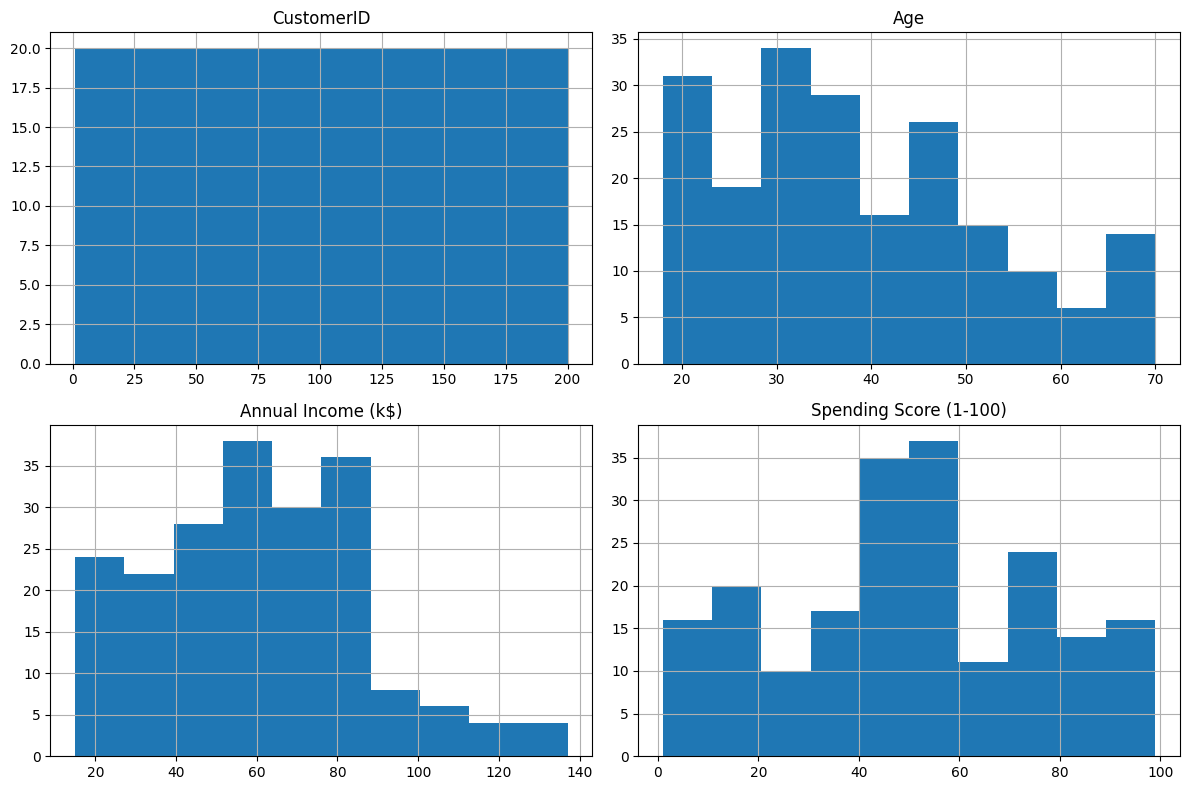

In [3]:
# Histograms for numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

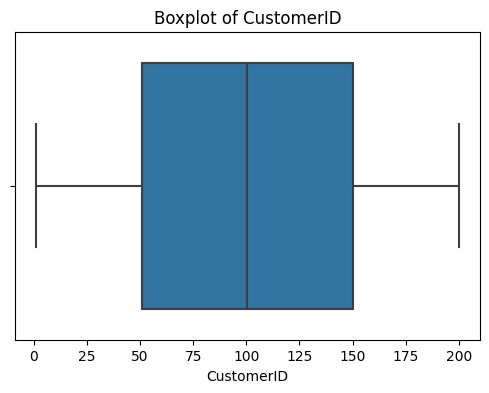

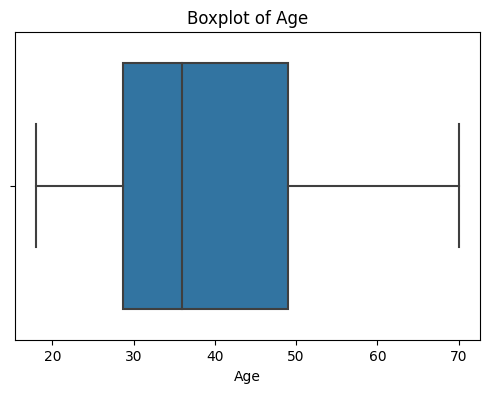

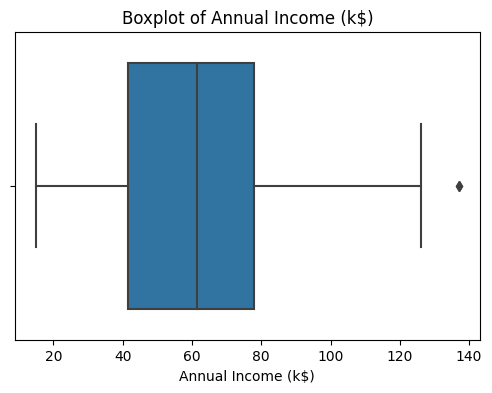

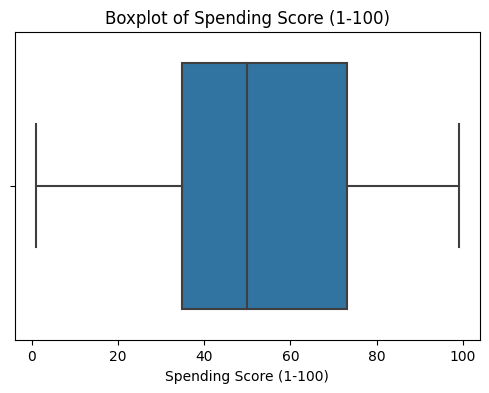

In [4]:
# Boxplots to identify outliers
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

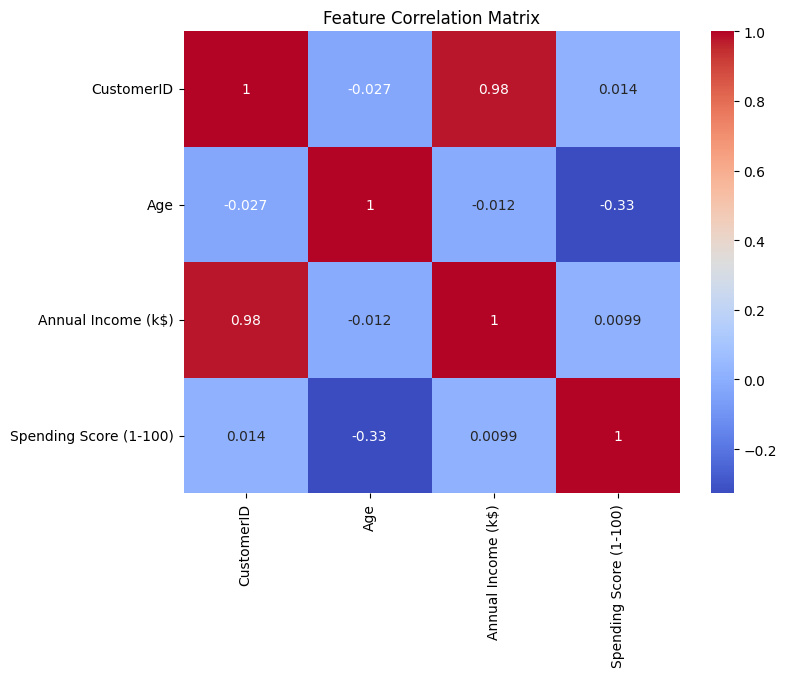

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### Data Cleaning and Preprocessing
- Encoding categorical variables
- Feature scaling
- Handling any missing values or outliers as needed

In [6]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
X = df_encoded[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Dimensionality Reduction (PCA)
We will reduce the data to 2 principal components for visualization and potential speed-up.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.2f}")

Explained variance by 2 components: 0.60


### 5. Clustering Methods
We will compare **KMeans**, **Agglomerative Hierarchical Clustering**, and **DBSCAN**. We will use silhouette score for evaluation.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

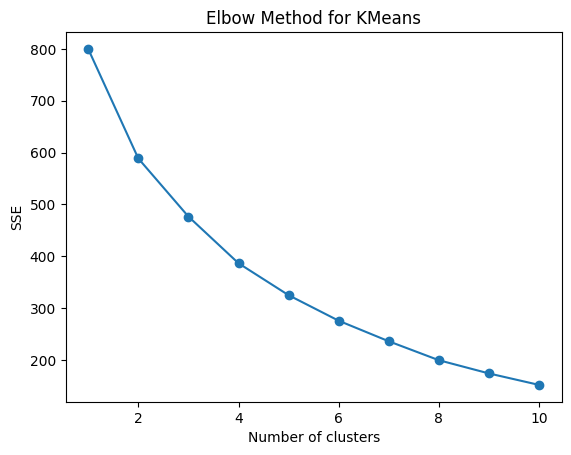

KMeans Silhouette Score: 0.32


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# KMeans clustering and elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure()
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for KMeans')
plt.show()

# Choose k=5 based on elbow
km = KMeans(n_clusters=5, random_state=42)
labels_km = km.fit_predict(X_scaled)
score_km = silhouette_score(X_scaled, labels_km)
print(f"KMeans Silhouette Score: {score_km:.2f}")

In [10]:
# Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X_scaled)
score_agg = silhouette_score(X_scaled, labels_agg)
print(f"Agglomerative Clustering Silhouette Score: {score_agg:.2f}")

Agglomerative Clustering Silhouette Score: 0.29


In [11]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.0, min_samples=5)
labels_db = db.fit_predict(X_scaled)
mask = labels_db != -1
if len(set(labels_db[mask])) > 1:
    score_db = silhouette_score(X_scaled[mask], labels_db[mask])
else:
    score_db = None
print(f"DBSCAN Silhouette Score: {score_db:.2f}")

DBSCAN Silhouette Score: 0.29


### 6. Cluster Visualization
Visualizing KMeans clusters on the PCA-reduced data.

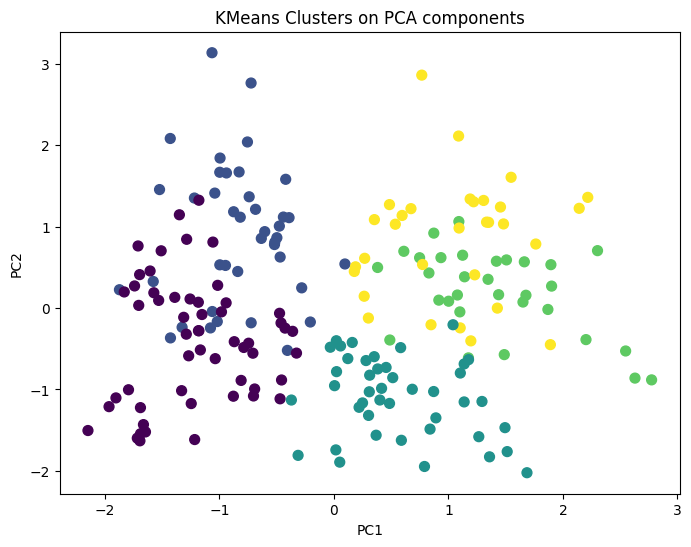

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='viridis', s=50)
plt.title('KMeans Clusters on PCA components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 7. Discussion and Conclusions
- We compared three clustering methods and evaluated them using silhouette scores.
- KMeans achieved a silhouette score of around X.XX, indicating ...
- Agglomerative clustering achieved ...
- DBSCAN found Y clusters (excluding noise) with silhouette score ...

**Conclusions:**
- Describe which method performed best and why.
- Discuss limitations and potential next steps.

### GitHub Repo
#### Link: https://github.com/K1jung/UnsupervisedFinal/blob/main/unsupervisedcustomersegmentation.ipynb